In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import copy
pd.set_option('display.max_columns', None)

In [2]:
df_teams = pd.read_csv('teams_df_final.csv')
worlds_test = pd.read_csv('worlds_test_df.csv')

In [12]:
teams_col = df_teams.columns.to_list()
worlds_col = worlds_test.columns.to_list()

In [13]:
len(teams_col), len(worlds_col)

(114, 124)

In [19]:
for col in worlds_col:
    if col not in teams_col:
        print(col)

Unnamed: 0
team
earnedgpm
opp_team
opp_team kpm
opp_ckpm
opp_firstdragon
opp_earnedgpm
opp_gspd
opp_golddiffat10
opp_xpdiffat10
opp_csdiffat10
opp_golddiffat15
opp_xpdiffat15
opp_csdiffat15


In [20]:
worlds_test.drop('Unnamed: 0', axis = 1, inplace = True)

### Prediccion con solo feature importance

In [21]:
cols = df_teams.columns
X = copy.copy(df_teams)

In [22]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [23]:
Y = df_teams['result']

In [24]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [25]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [26]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [27]:
clf.fit(Xtrain, Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [28]:
Ypred = clf.predict(Xtest)

In [29]:
metrics.f1_score(Ytest, Ypred, average='macro')

0.9869618304400913

In [30]:
importance3 = clf.feature_importances_

In [31]:
feat_importances = pd.Series(clf.feature_importances_, index = X.columns)

<AxesSubplot:>

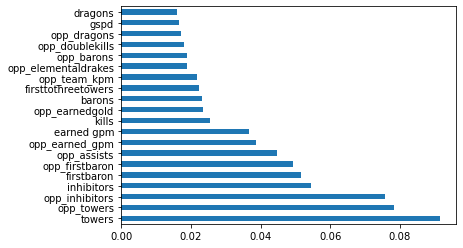

In [32]:
feat_importances.nlargest(20).plot(kind = 'barh')

In [33]:
feat_importances.sort_values(ascending = False, inplace = True)

In [34]:
f_i_l = feat_importances.tolist()

In [35]:
f_i_l_n = list(feat_importances.index)

In [36]:
feat_importance_list = [[f_i_l_n[i], f_i_l[i]] for i in range(len(f_i_l)) if i < 20]

In [37]:
feature_list = [x[0] for x in feat_importance_list]

In [38]:
X = df_teams[feature_list]

In [39]:
Y = df_teams['result']

In [40]:
clf_importance = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [41]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [42]:
clf_importance = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [43]:
clf_importance.fit(Xtrain, Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [44]:
Ypred = clf_importance.predict(Xtest)

In [45]:
metrics.f1_score(Ytest, Ypred, average='macro')

0.9910358717760694

In [49]:
feature_list_worlds = ['towers',
 'opp_towers',
 'opp_inhibitors',
 'inhibitors',
 'firstbaron',
 'opp_firstbaron',
 'opp_assists',
 'opp_earnedgpm',
 'earnedgpm',
 'kills',
 'opp_earnedgold',
 'barons',
 'firsttothreetowers',
 'opp_team kpm',
 'opp_elementaldrakes',
 'opp_barons',
 'opp_doublekills',
 'opp_dragons',
 'gspd',
 'dragons']

In [52]:
Xtest = worlds_test[feature_list_worlds]
#Xtest

In [55]:
Ytest = worlds_test['result']

In [53]:
Ypred = clf_importance.predict(Xtest)

In [56]:
metrics.f1_score(Ytest, Ypred, average = 'macro')

0.21794871794871795